<a href="https://colab.research.google.com/github/sauravnaldas/Machine-Learning-with-R/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**: 
Coronaviruses are a group of related viruses that can cause respiratory tract infection in humans ranging from mild symptoms to lethal outcomes. Until now, there are seven genera of coronaviruses that are known to infect humans.

SARS-CoV-2 is a new type of coronavirus that causes the Coronavirus Disease 2019 (COVID-19), which has been the most challenging pandemic in this century. Considering its high mortality and rapid spread, an effective vaccine is urgently needed to control this pandemic. As a result, the academia, industry, and government sectors are working tightly together to develop and test a variety of vaccines at an unprecedented pace. In this notebook I want to present an overview of vacciantion progress in the world and answer following questions during the road:

* What vaccines are used and in which countries?
* What country is vaccinated more people?
* What country is fully vaccinated more people?
* What country is vaccinated a larger percent from its population?
* What country is fully vaccinated a larger percent from its population?

In [ ]:
# Import required packages and importing the dataset
library(tidyverse)
library(maps)
library(rnaturalearth)
library(ggplot2)
library(dplyr)
covid= read.csv("../input/covid-19-vaccination/country_vaccinations.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




In [ ]:
# getting the str of the dataset
str(covid)
summary(covid)
# calculating the missing values
sum(is.na(covid))

'data.frame':	5236 obs. of  15 variables:
 $ country                            : chr  "Albania" "Albania" "Albania" "Albania" ...
 $ iso_code                           : chr  "ALB" "ALB" "ALB" "ALB" ...
 $ date                               : chr  "2021-01-10" "2021-01-11" "2021-01-12" "2021-01-13" ...
 $ total_vaccinations                 : num  0 NA 128 188 266 308 369 405 447 483 ...
 $ people_vaccinated                  : num  0 NA 128 188 266 308 369 405 447 483 ...
 $ people_fully_vaccinated            : num  NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_raw             : num  NA NA NA 60 78 42 61 36 42 36 ...
 $ daily_vaccinations                 : num  NA 64 64 63 66 62 62 58 55 51 ...
 $ total_vaccinations_per_hundred     : num  0 NA 0 0.01 0.01 0.01 0.01 0.01 0.02 0.02 ...
 $ people_vaccinated_per_hundred      : num  0 NA 0 0.01 0.01 0.01 0.01 0.01 0.02 0.02 ...
 $ people_fully_vaccinated_per_hundred: num  NA NA NA NA NA NA NA NA NA NA ...
 $ daily_vaccinations_per

   country            iso_code             date           total_vaccinations
 Length:5236        Length:5236        Length:5236        Min.   :       0  
 Class :character   Class :character   Class :character   1st Qu.:   32873  
 Mode  :character   Mode  :character   Mode  :character   Median :  218645  
                                                          Mean   : 1913965  
                                                          3rd Qu.:  999744  
                                                          Max.   :85008094  
                                                          NA's   :1874      
 people_vaccinated  people_fully_vaccinated daily_vaccinations_raw
 Min.   :       0   Min.   :       1        Min.   : -11076       
 1st Qu.:   30886   1st Qu.:   13155        1st Qu.:   2463       
 Median :  203688   Median :   66959        Median :  12457       
 Mean   : 1612734   Mean   :  574247        Mean   :  78695       
 3rd Qu.:  862777   3rd Qu.:  342116        3rd Q

[1] 17602

In [ ]:
# Now starting the EDA part
covid_data_total_vaccination_done = covid %>%
  group_by(country) %>%
  filter(!is.na(total_vaccinations)) %>%
  summarise(
    total_vaccinations = max(total_vaccinations),
    total_vaccinations_per_hundred = max(total_vaccinations_per_hundred),
    vaccines = first(vaccines),
  ) %>%
  filter(total_vaccinations_per_hundred >= 0.5) %>%
arrange(desc(total_vaccinations))
head(covid_data_total_vaccination_done)

country,total_vaccinations,total_vaccinations_per_hundred,vaccines
<chr>,<dbl>,<dbl>,<chr>
United States,85008094,25.42,"Moderna, Pfizer/BioNTech"
China,52520000,3.65,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
United Kingdom,22392883,32.99,"Oxford/AstraZeneca, Pfizer/BioNTech"
India,19497704,1.41,"Covaxin, Oxford/AstraZeneca"
England,18835355,33.46,"Oxford/AstraZeneca, Pfizer/BioNTech"
Brazil,10169160,4.78,"Oxford/AstraZeneca, Sinovac"


# Top 5 counties in total vaccination count.

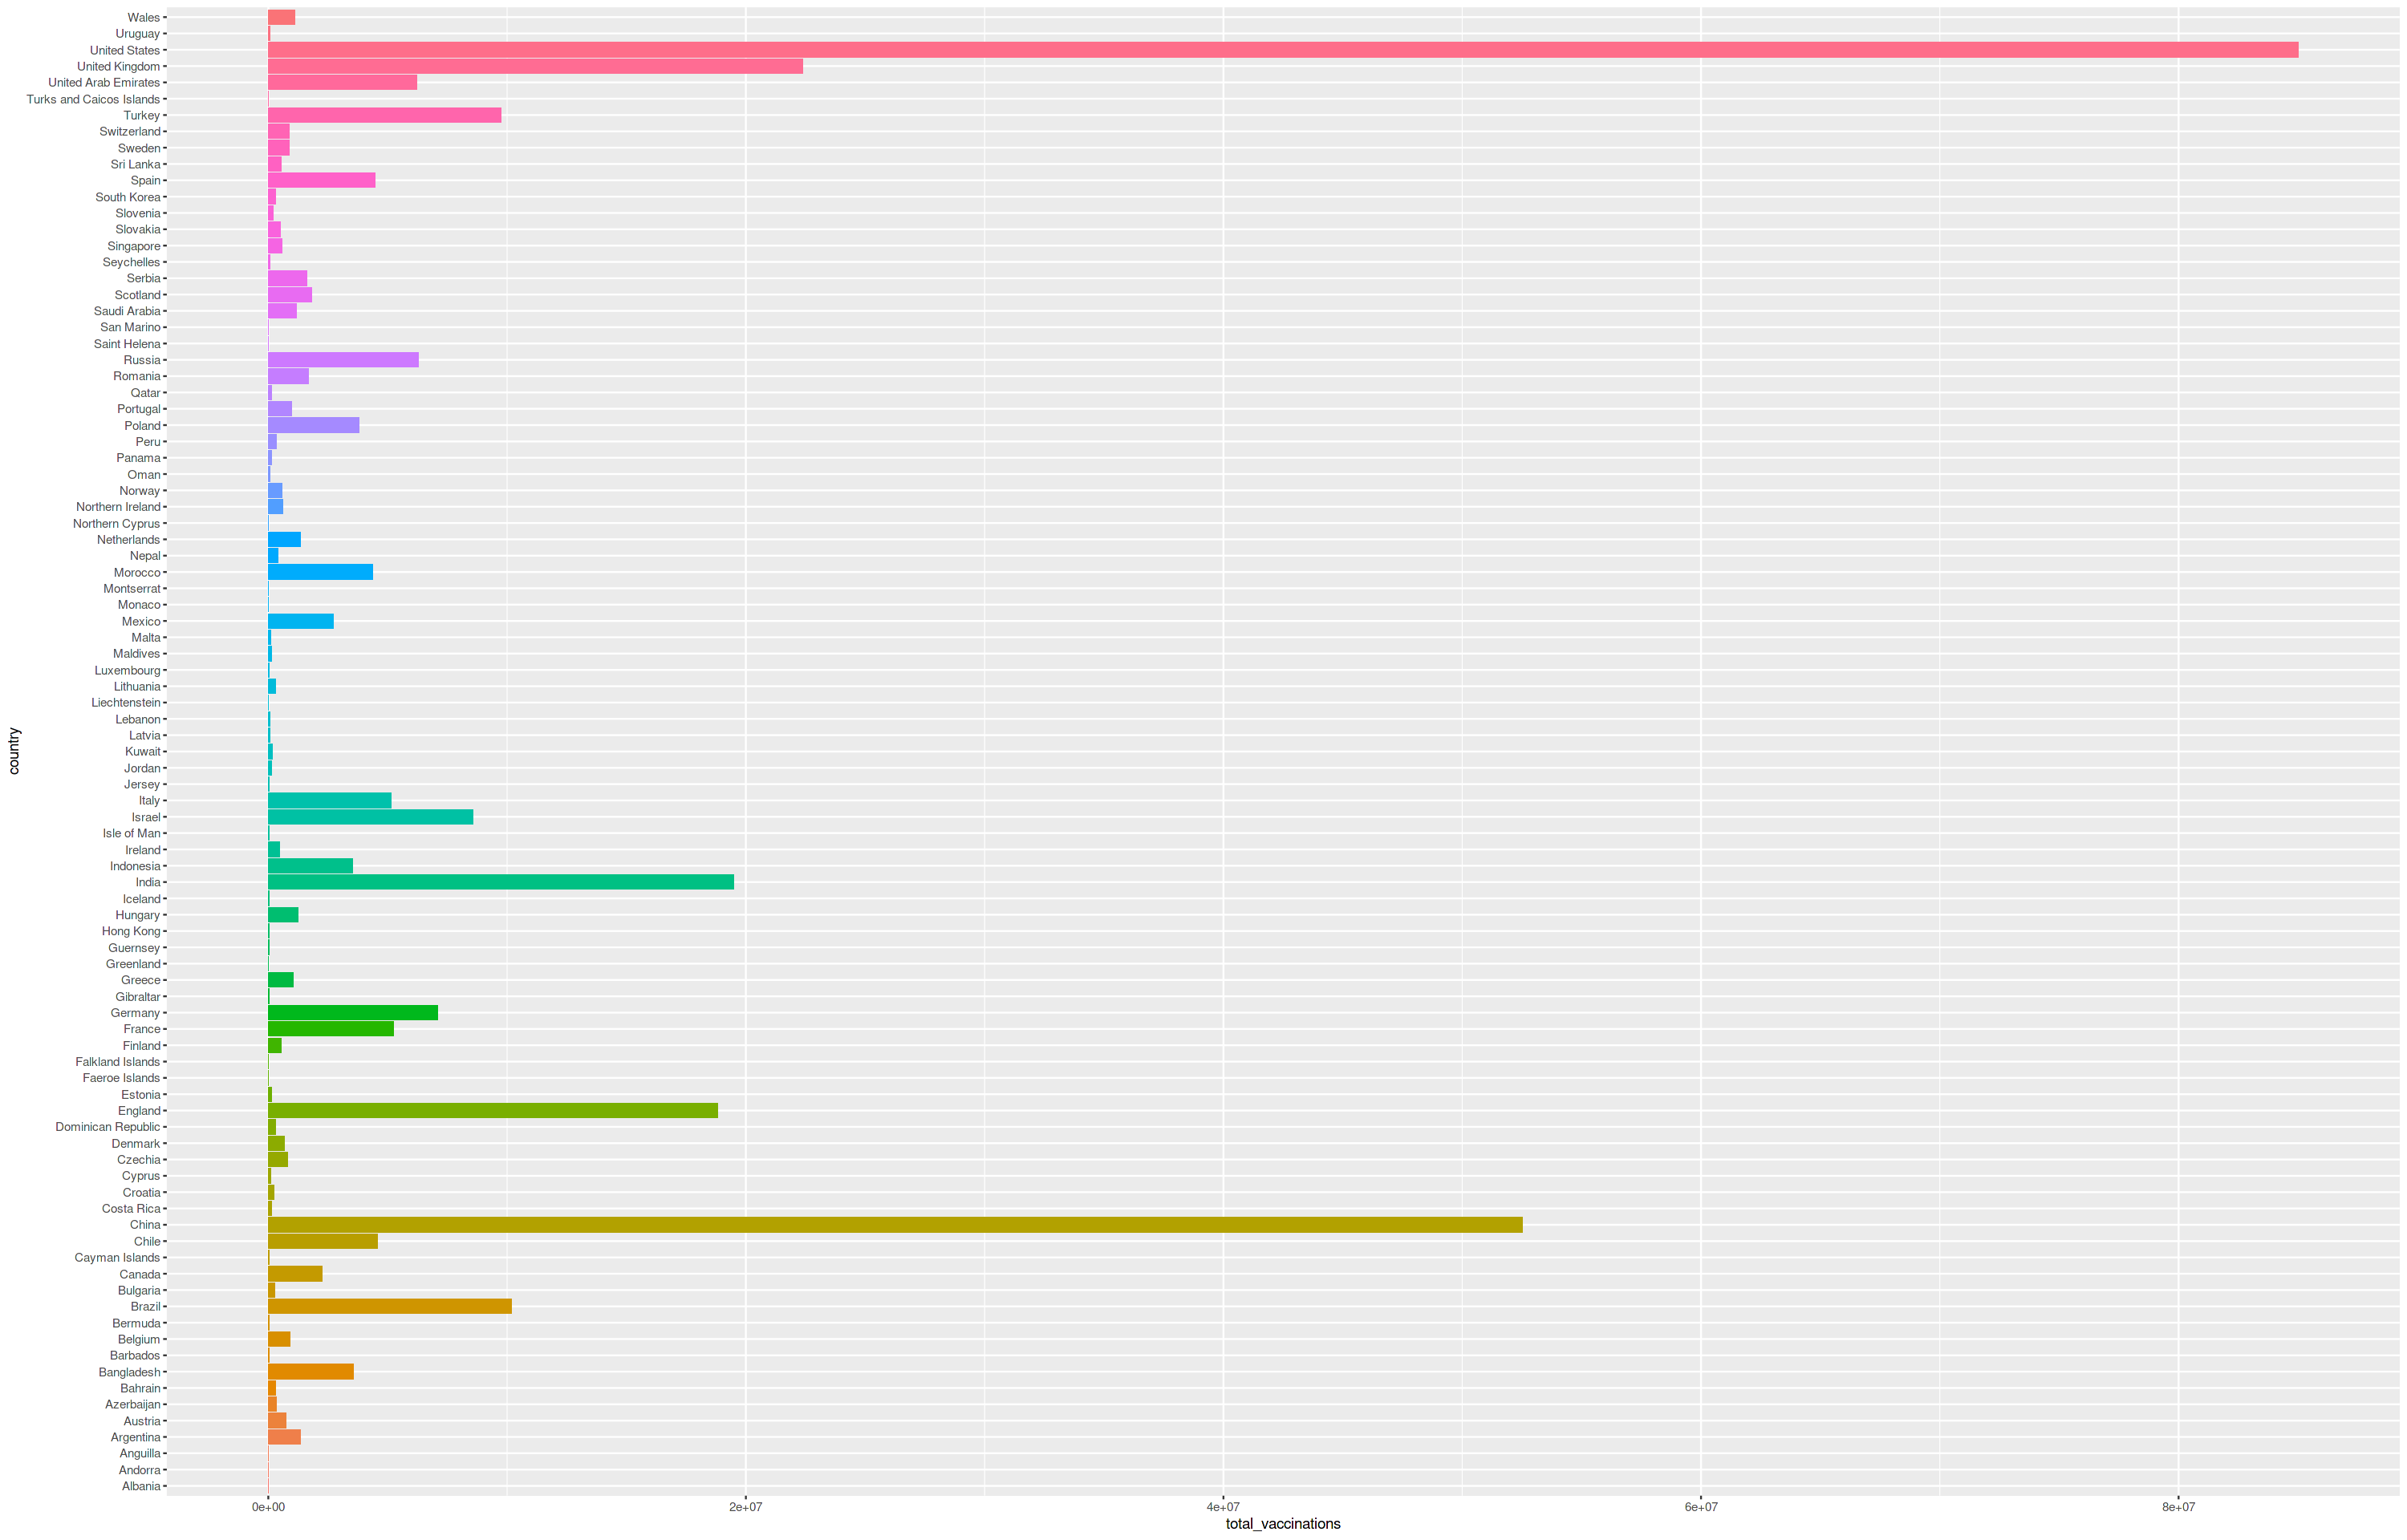

In [ ]:
options(repr.plot.width=25,repr.plot.height=16)
covid_data_total_vaccination_done %>%
    ggplot(aes(x = total_vaccinations, y = country)) +
    geom_bar(aes(fill = country), position = "identity", stat = "identity", show.legend = FALSE)

# Here it is evident that, United States has vaccinated vaccinate people more than other countries. the other ranks are for China, United Kingdom, England and India.

In [ ]:
covid_data_fully_vaccinated <- covid %>%
    group_by(country) %>%
    filter(!is.na(people_fully_vaccinated)) %>%
    summarise(
        total_vaccinations_per_hundred = max(total_vaccinations_per_hundred),
        people_fully_vaccinated = max(people_fully_vaccinated),
        people_fully_vaccinated_per_hundred = max(people_fully_vaccinated_per_hundred),
    ) %>%
    filter(total_vaccinations_per_hundred >= 0.5) %>%
    select(country, people_fully_vaccinated, people_fully_vaccinated_per_hundred) %>%
arrange(desc(people_fully_vaccinated))
head(covid_data_fully_vaccinated)

country,people_fully_vaccinated,people_fully_vaccinated_per_hundred
<chr>,<dbl>,<dbl>
United States,28701201,8.58
Israel,3660333,42.29
India,3501021,0.25
Brazil,2468014,1.16
Germany,2346388,2.80
Turkey,2309952,2.74


# Top 5 countries with fully vacinated population

In [ ]:
options(repr.plot.width=30,repr.plot.height=10)
covid_data_fully_vaccinated %>%
    ggplot(aes(x = people_fully_vaccinated_per_hundred, y = country)) +
    geom_bar(aes(fill = country), position = "identity", stat = "identity", show.legend = FALSE)

ERROR: ignored

# In this chart we see Gibraltar, Israel, Seychelles, United Arab Emirates and Falkland Islands vaccinate a larger percent of populations. So these regions are more successful than other areas in vaccinating their people.

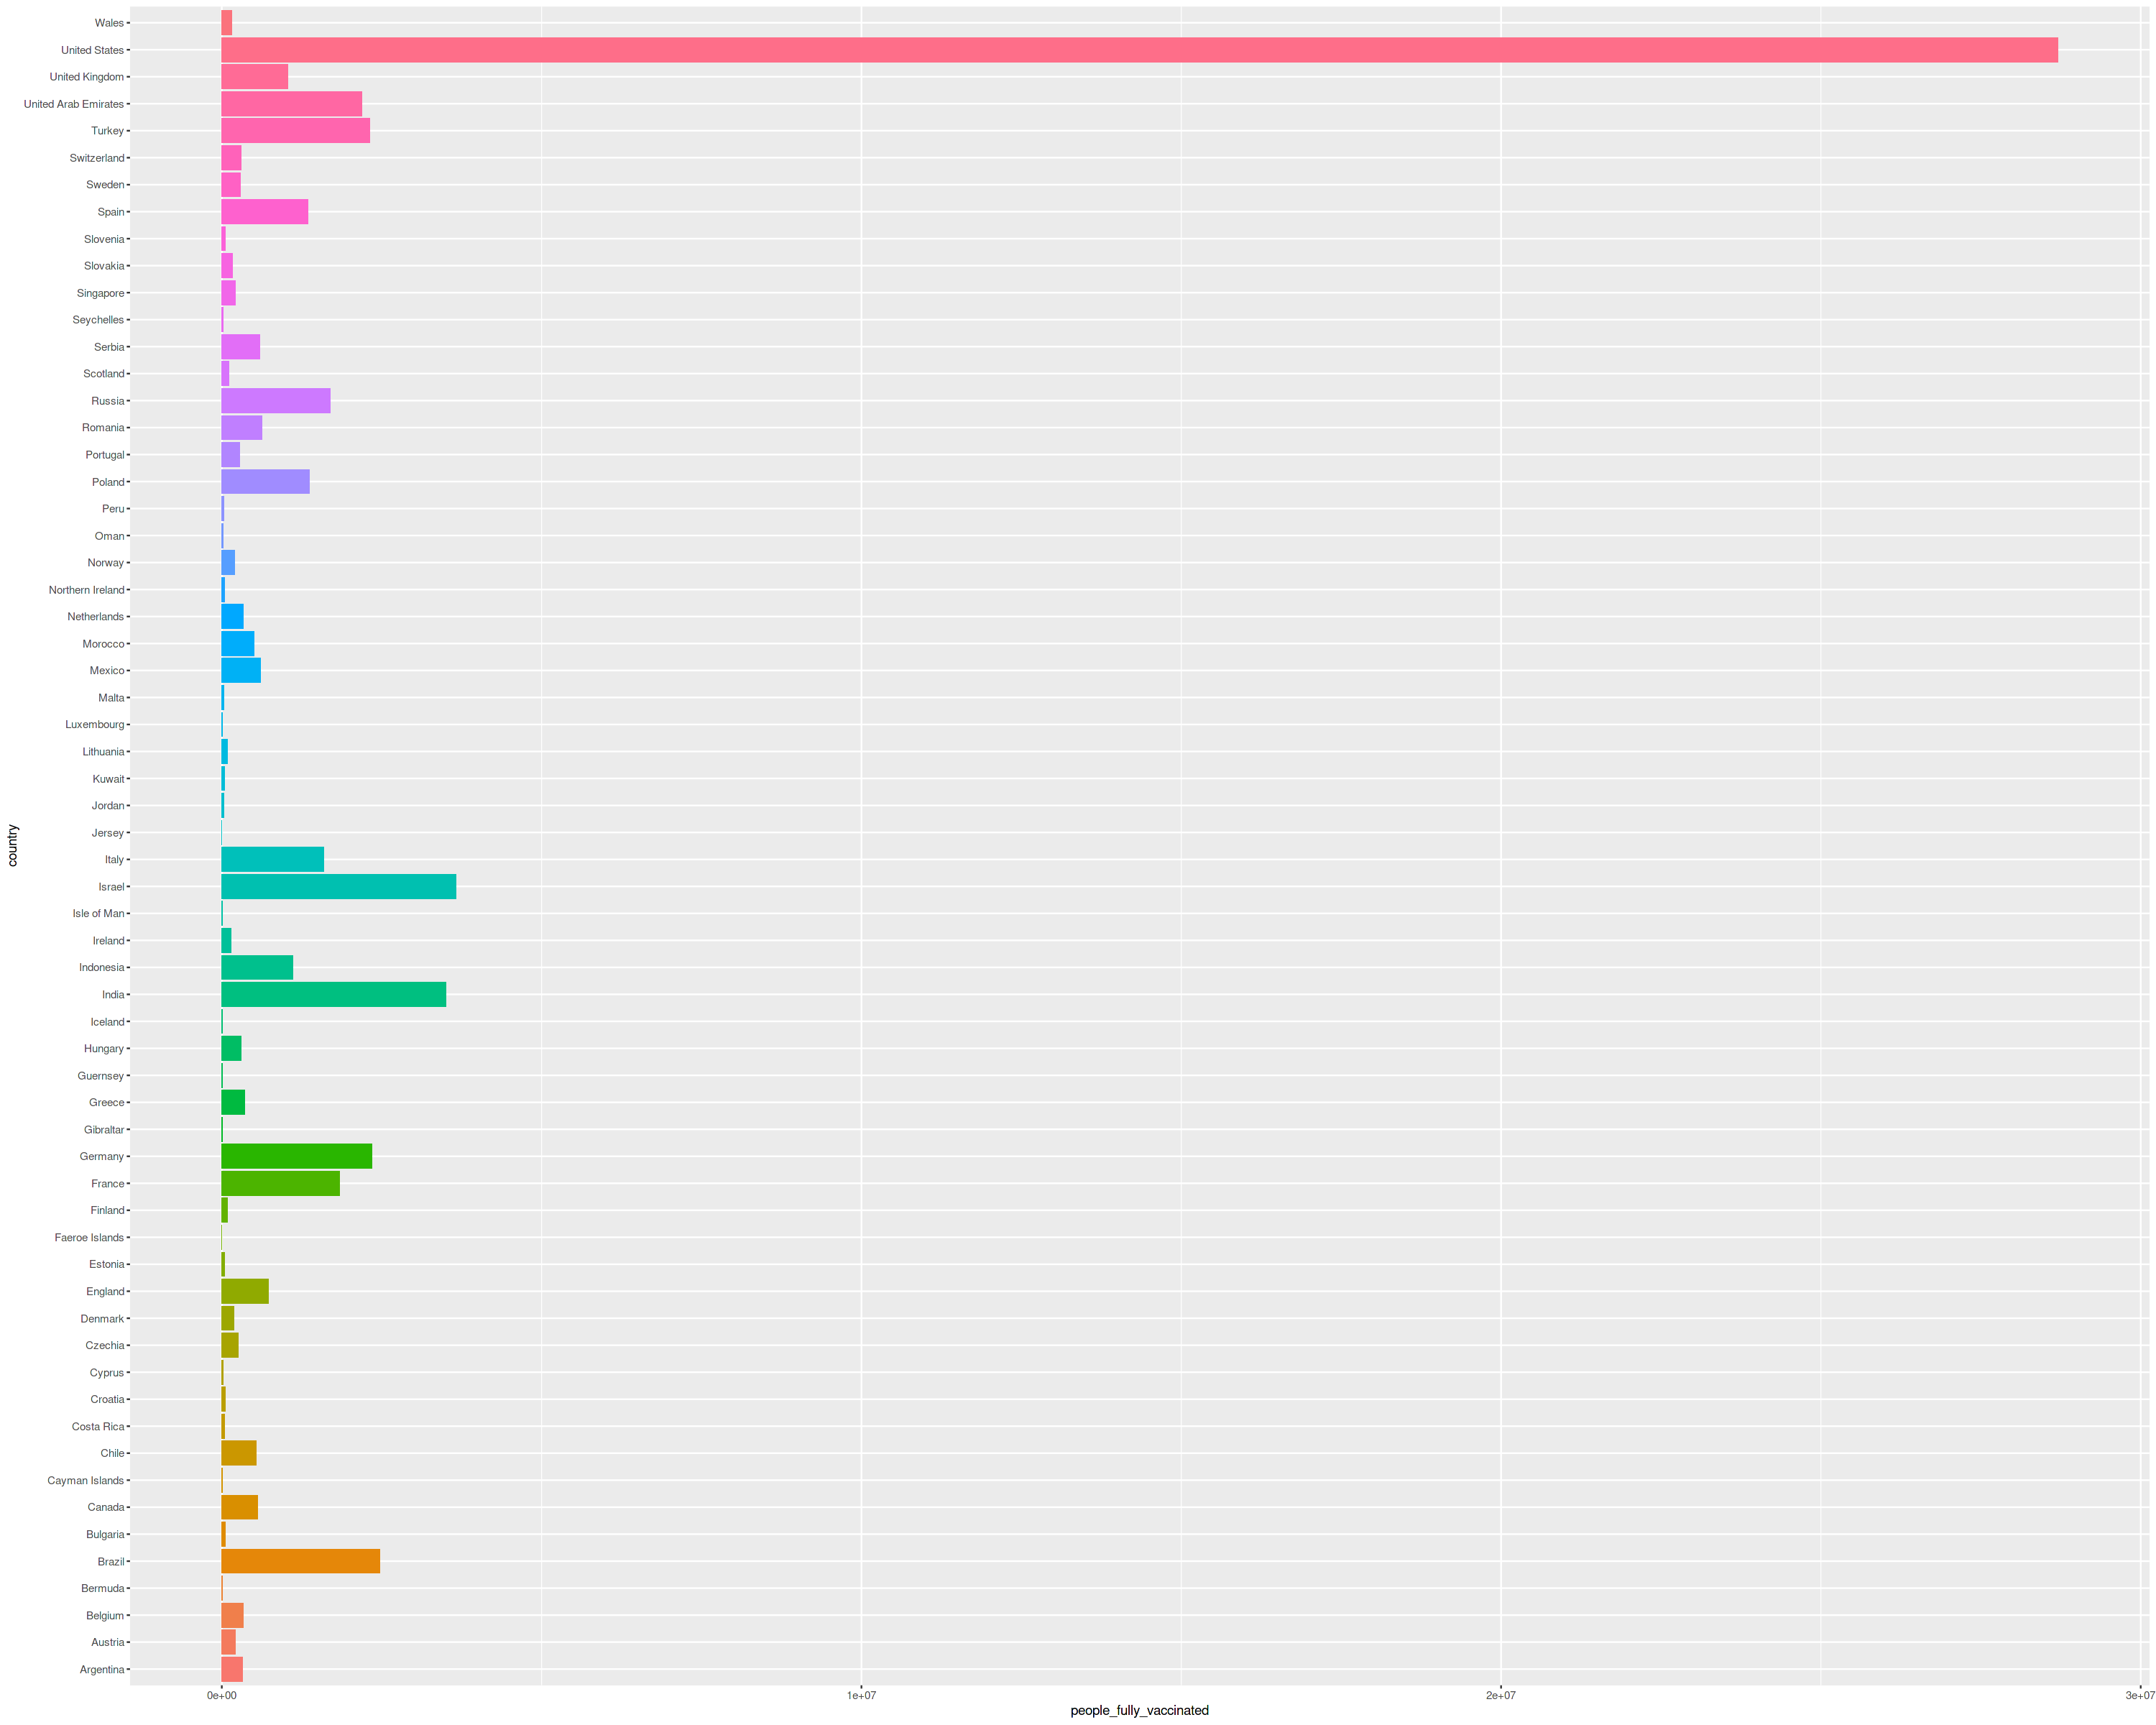

In [ ]:
options(repr.plot.width=25,repr.plot.height=20)
covid_data_fully_vaccinated %>%
    ggplot(aes(x = people_fully_vaccinated, y = country)) +
    geom_bar(aes(fill = country), position = "identity", stat = "identity", show.legend = FALSE)

# US by far has been vaccinated more people completely.

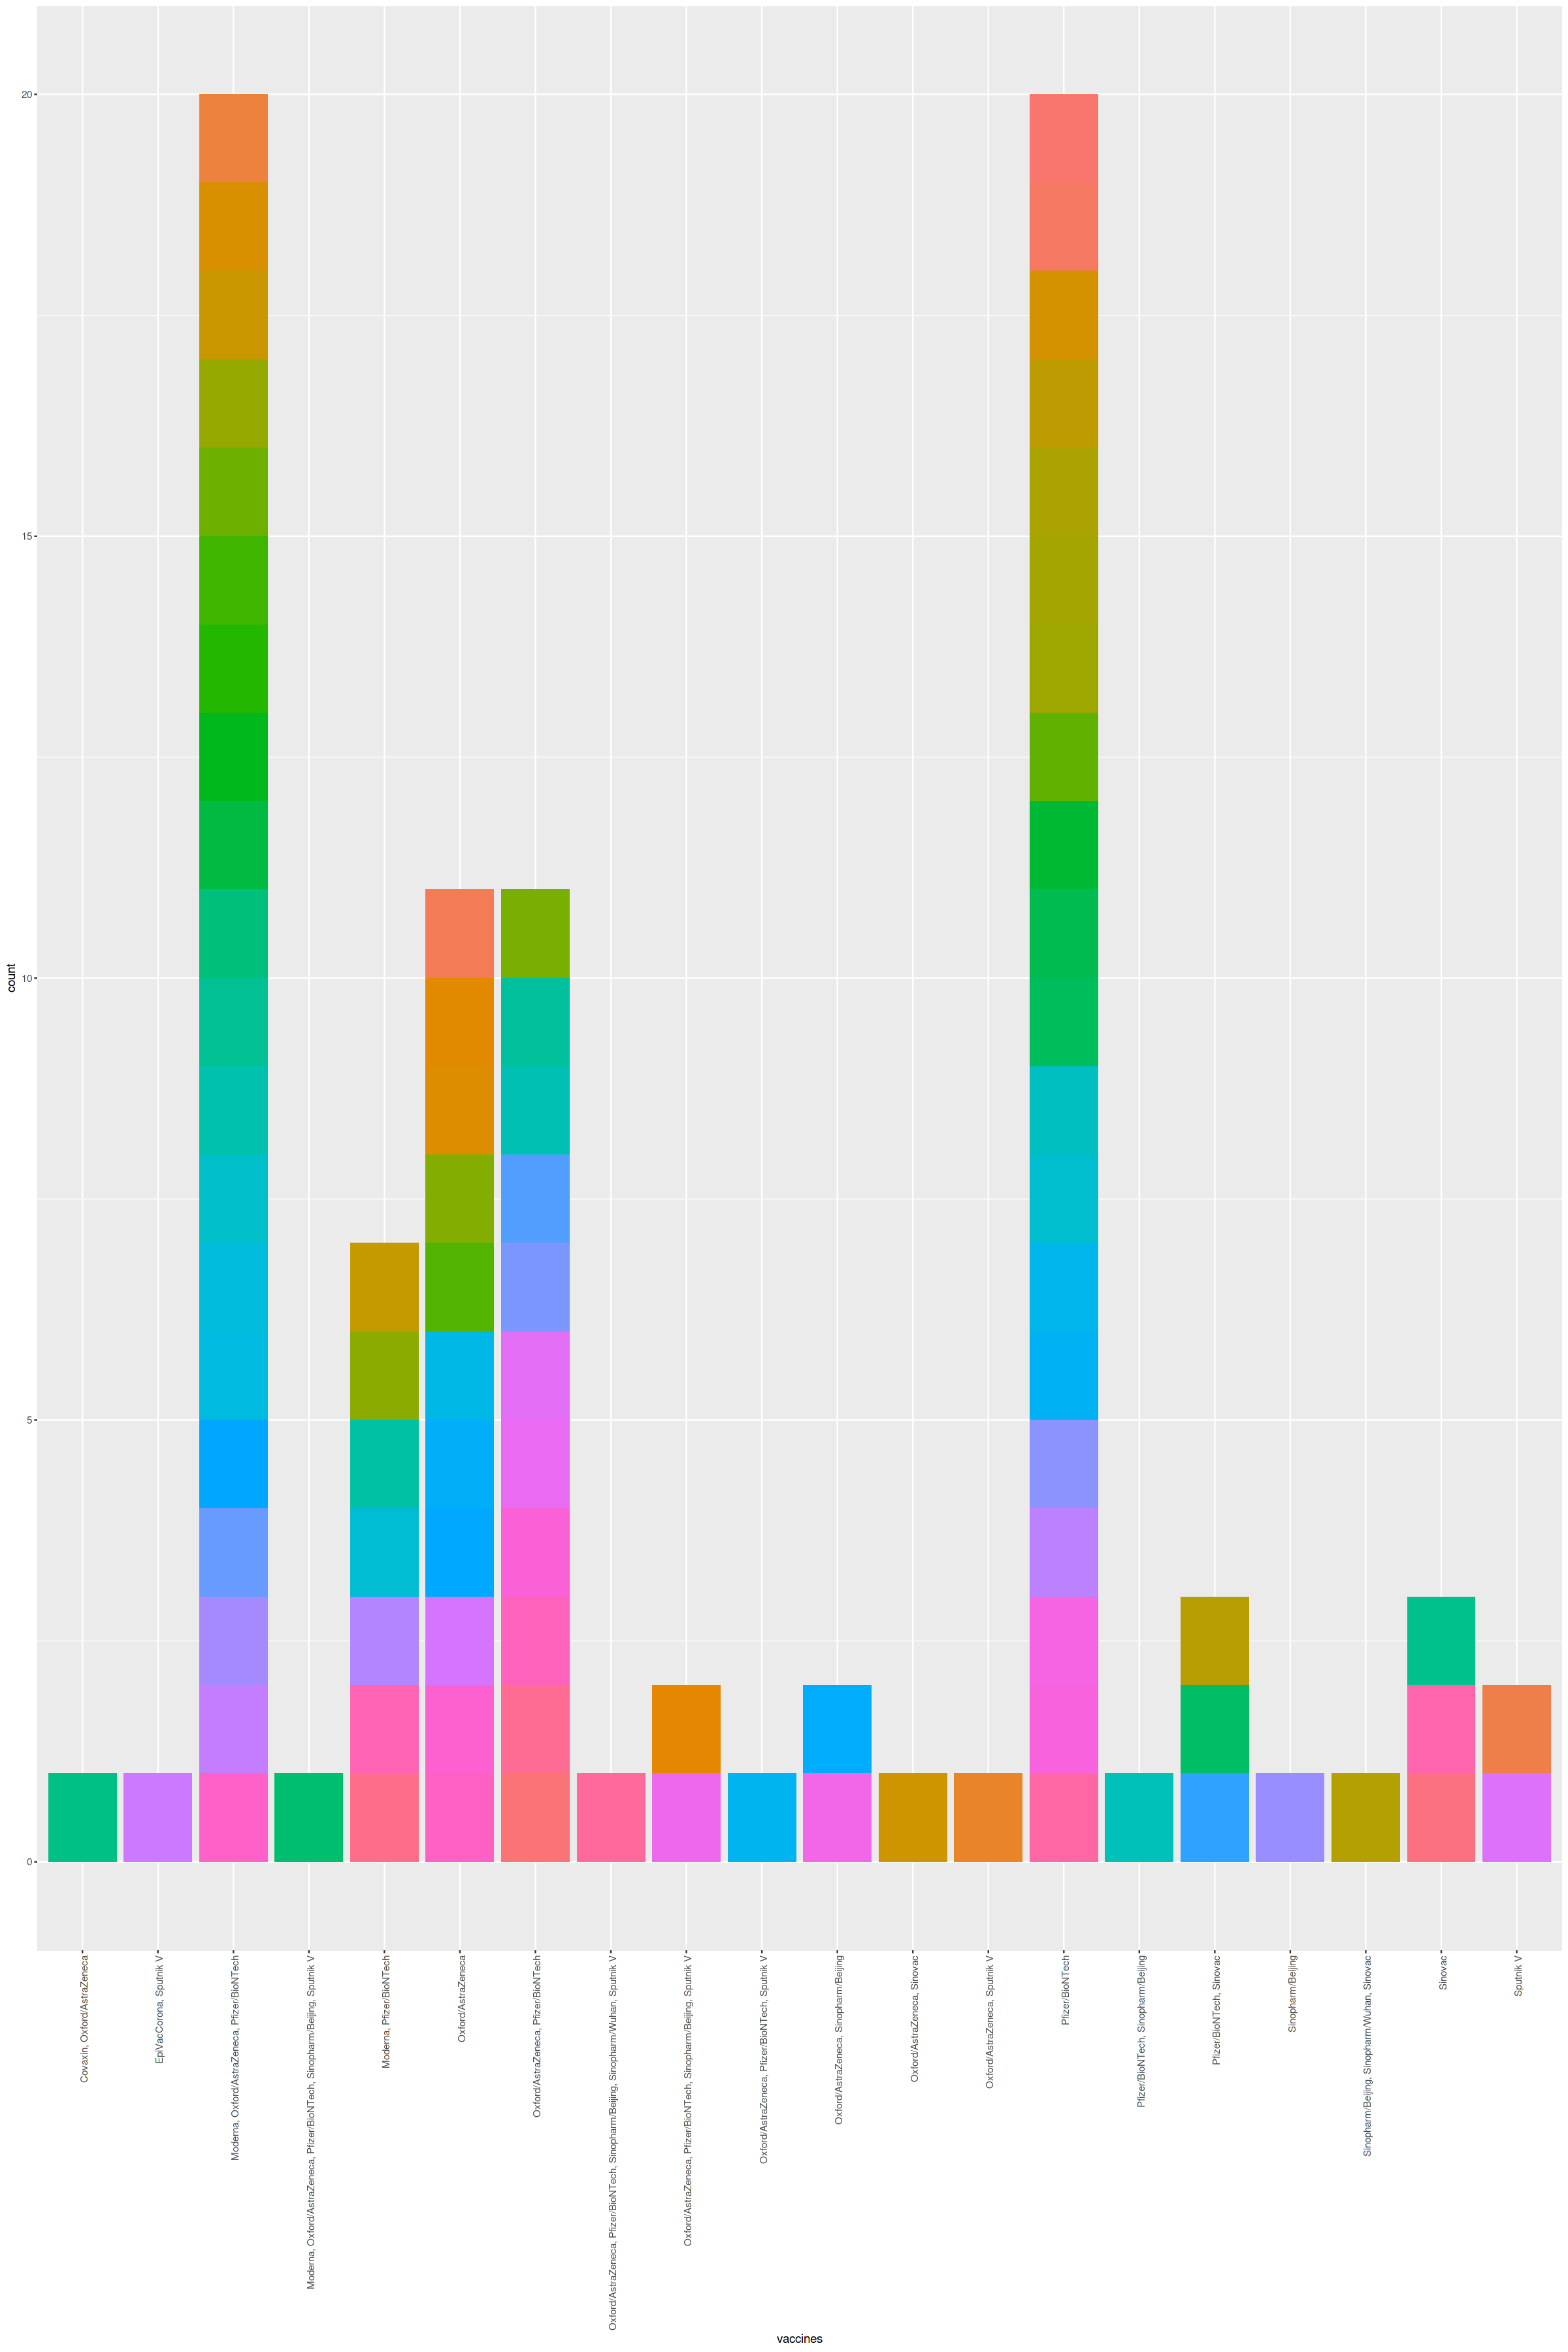

In [ ]:
options(repr.plot.width=20,repr.plot.height=30)
covid_data_total_vaccination_done %>%
group_by(vaccines) %>%
ggplot(aes(x=vaccines))+geom_bar(aes(fill=country),show.legend=FALSE)+  theme(axis.text.x = element_text(angle = 90, vjust = 0.7, hjust=1))

#  Based on the barplot we can say most of countries use a mixture of variety vaccines for preventing from COVID-19. "Moderna, Oxford/AstraZeneca, Pfizer/BioNTech" is used more than other vaccines combinations and between countries using only one vaccine, "Pfizer/BioNTech" is the leader.

# **Conclusion:**
# 1. # United States has vaccinated vaccinate people more than other countries. the other ranks are for China, United Kingdom, England and India.
# 2. #  Israel, Seychelles, United Arab Emirates and Falkland Islands vaccinate a larger percent of populations.
# 3. #   US by far has been vaccinated more people completely.
# 4. #   Moderna, Oxford/AstraZeneca, Pfizer/BioNTech" is used more than other vaccines combinations and between countries using only one vaccine, "Pfizer/BioNTech" is the leader